# Recognizing Handwritten Digits with scikit-learn

## Importing libraries

In [ ]:
import numpy as np
from sklearn import tree
import math
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Loading dataset

In [14]:
digits = datasets.load_digits()

In [24]:
n_samples = len(digits.images)
n_samples

1797

In [16]:
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

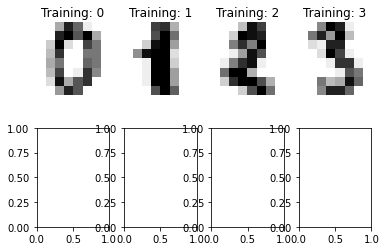

In [17]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

### train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)


# DECISION TREE 

In [38]:
clf = tree.DecisionTreeClassifier(max_depth= 11);
clf = clf.fit(X_train, y_train)

In [39]:
output_predicted_Training = clf.predict(X_train);

In [40]:
accuracy = accuracy_score(y_train, output_predicted_Training)
print("Verification: The accuracy of the prediction on Training dataset:")
print(accuracy*100)

Verification: The accuracy of the prediction on Training dataset:
100.0


In [41]:
output_predicted_test = clf.predict(X_test);

accuracy_test= accuracy_score(y_test, output_predicted_test);
print("TEST: The accuracy of prediction on the Tesr dataset formed.")
print(accuracy_test*100);

TEST: The accuracy of prediction on the Tesr dataset formed.
75.52836484983315


### Here ,our accuracy for prediction on training dataset is 100% and our accuracy on testing the prediction on test dataset is 75%(approx)

## SVM

In [42]:
classifier = svm.SVC(gamma=0.001)

In [43]:
classifier.fit(X_train, y_train)


SVC(gamma=0.001)

In [44]:
predicted = classifier.predict(X_test)


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

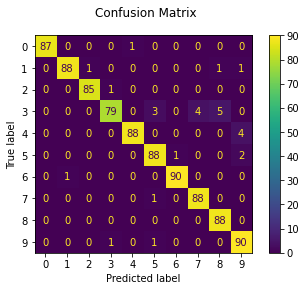

In [45]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()